In [2]:
import sys
sys.path.append("./../../bower")
%load_ext autoreload
%autoreload 2

In [3]:
from bowel.data.data_loader import DataLoader
from bowel.data.label_creator import LabelCreator

In [4]:
import pathlib
from bowel.utils.io import load_divsion_file
import matplotlib.pyplot as plt
from bowel.utils.io import load_config
import numpy as np
import librosa
import librosa.display
# import seaborn as sns
# sns.set_theme()
CONFIG_DIR = pathlib.Path("./../configs/")

DATA_DIR = pathlib.Path("./../data/processed/")
DIVISION_FILE_PATH = pathlib.Path("./../data/processed/files.csv")

division_data = load_divsion_file(DIVISION_FILE_PATH)
data_loader = DataLoader(DATA_DIR, division_data)

In [5]:
data = data_loader.load_data()

2023-01-29 16:51:01.482 | INFO     | bowel.data.data_loader:load_data:36 - Data loading started
2023-01-29 16:51:05.494 | INFO     | bowel.data.data_loader:load_data:41 - Data loading done


In [6]:
data.iloc[0][0].shape

(88200,)

In [7]:
transform_config_path = CONFIG_DIR / "mfcc_transformation.yaml"

transform_config = load_config(transform_config_path)

label_creator = LabelCreator(DATA_DIR, division_data, transform_config)
labels = label_creator.labels

2023-01-29 16:51:05.649 | INFO     | bowel.data.label_creator:labels:47 - Label creation started
100%|██████████| 1606/1606 [00:04<00:00, 362.42it/s]
2023-01-29 16:51:10.106 | INFO     | bowel.data.label_creator:labels:49 - Label creation done


In [8]:
# plt.style.use('default')
# plt.figure(figsize=(16, 9))
# plt.plot(data.iloc[0][0][:11025])
# plt.xlabel("sample index", fontsize=16)
# plt.ylabel("amplitude", fontsize=16)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# # plt.gca().spines[['right', 'top']].set_visible(False)
# # plt.savefig("./sample_audio.jpg", dpi=300)

(0.0, 2500.0)

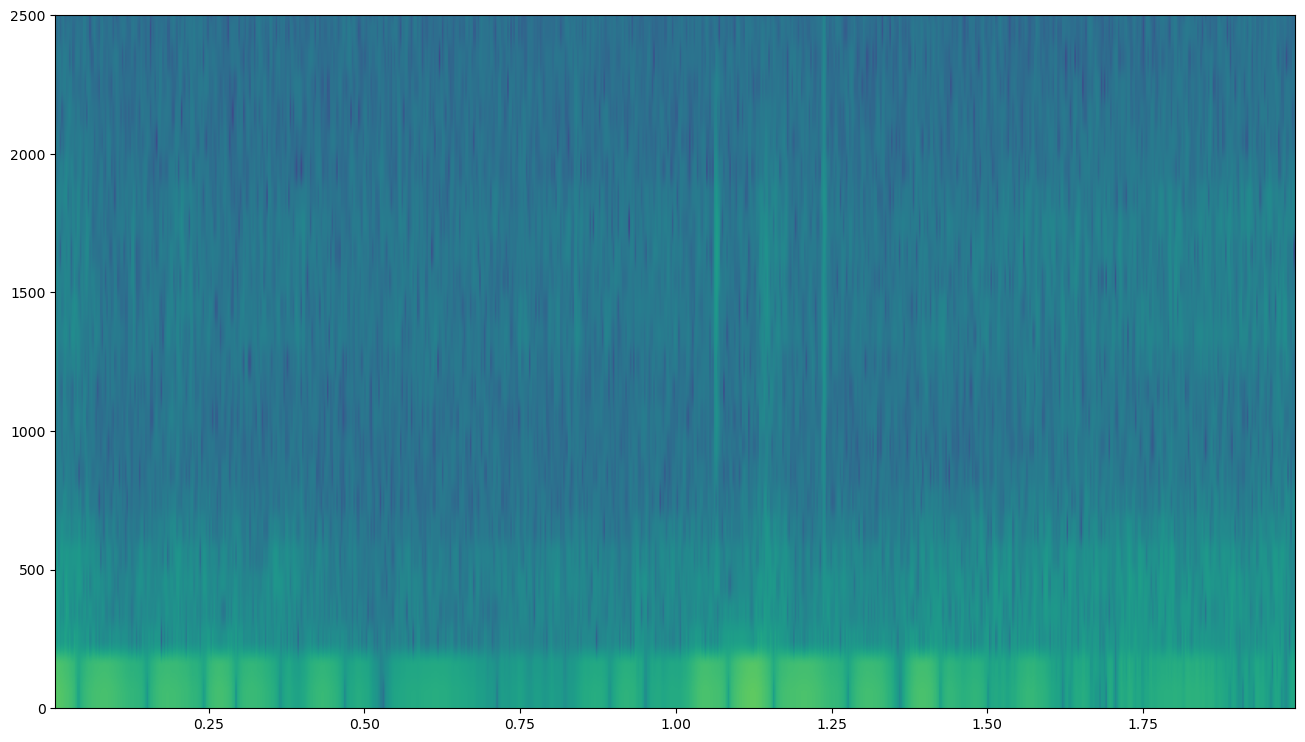

In [9]:
# Plot a single spectrogram using matplotlib
import matplotlib as mpl
plt.figure(figsize=(16, 9))
plt.specgram(data.iloc[117][0][:], Fs=44_100, window=mpl.mlab.window_hanning, NFFT=440, noverlap=330, vmax=1)
plt.ylim([0, 2500])

In [10]:
# Plot a spectrogram using librosa

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   1.06 1.07 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.24 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.  ]


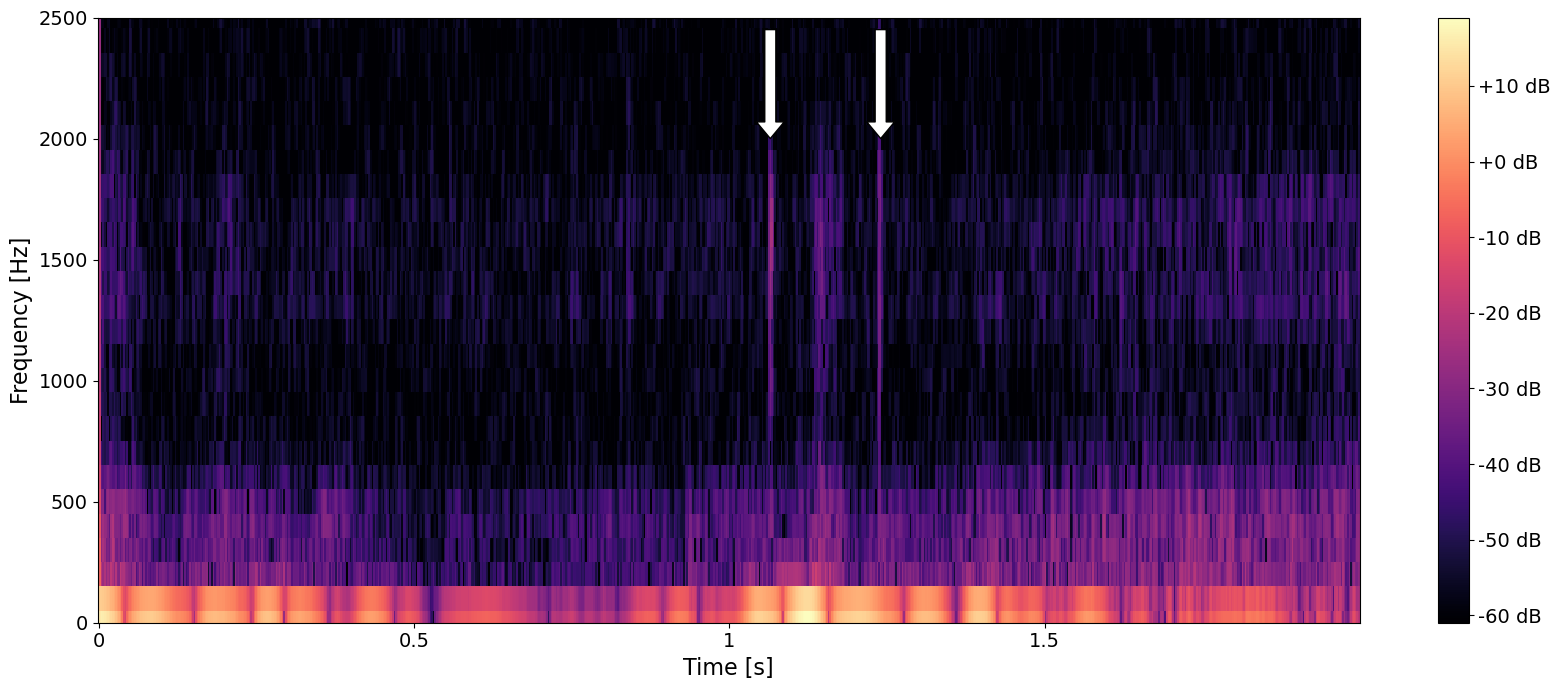

In [93]:
# data_id = np.argmax(data.reset_index().filename == "47_agrest-M200516-1-2-part20210122.wav")#40
data_id = 117
print(labels[data_id] * np.arange(0, 200)/100)
y = data.iloc[data_id][0][:]
D = librosa.stft(y, n_fft=440, hop_length=110)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_power = np.abs(D)**2
fig = plt.figure(figsize=(16, 7))
img = librosa.display.specshow(librosa.power_to_db(S_power), n_fft=440, hop_length=110, y_axis='linear', x_axis="time", sr=44_100)
plt.ylim([0, 2500])
bowel_sounds_idxs = [1.065, 1.24] #[0.23, 0.34, 1.14, 1.24]
cbar = fig.colorbar(img, ax=plt.gca(), format="%+2.f dB")
cbar.ax.tick_params(labelsize=14)
for bs_id in bowel_sounds_idxs:
    plt.annotate("", xy=(bs_id, 2000), xytext=(bs_id, 2450), arrowprops=dict(facecolor='white', shrink=0., width=8, headwidth=20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Time [s]", fontsize=16)
plt.ylabel("Frequency [Hz]", fontsize=16)
fig.tight_layout();
plt.subplots_adjust(right=1.05)
fig.savefig("./spectrogram_with_bs.jpg", dpi=200);

/Users/adamnarozniak/Applications/miniconda3/envs/bowel/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


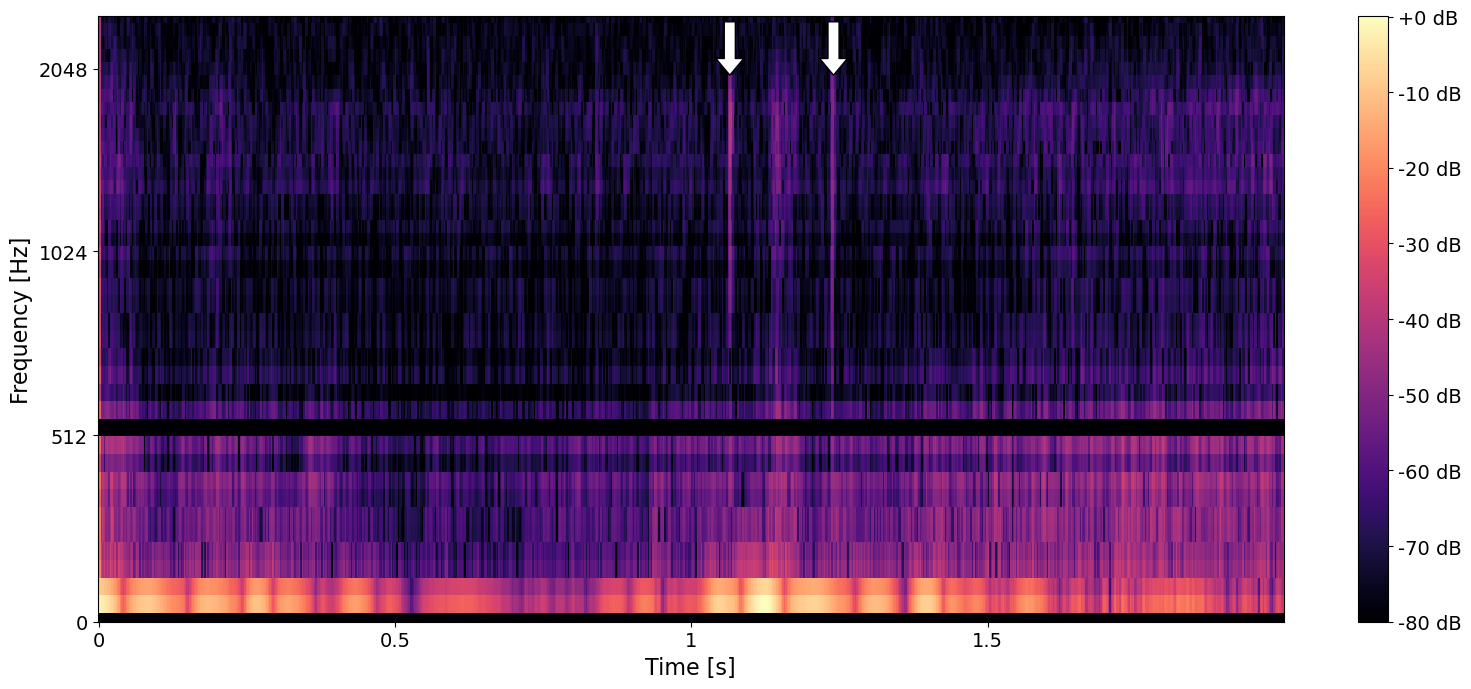

In [87]:
S_mel = librosa.feature.melspectrogram(y=y, sr=44_100, n_mels=40, fmax=2500, n_fft=440, hop_length=110)
S_mel_dB = librosa.power_to_db(S_mel, ref=np.max)

fig = plt.figure(figsize=(16, 7))
img = librosa.display.specshow(S_mel_dB, y_axis='mel', x_axis="time", sr=44_100, fmax=2500, n_fft=440, hop_length=110)
plt.ylim([0, 2500])
bowel_sounds_idxs = [1.065, 1.24] #[0.23, 0.34, 1.14, 1.24]
cbar = fig.colorbar(img, ax=plt.gca(), format="%+2.f dB")
cbar.ax.tick_params(labelsize=14)
for bs_id in bowel_sounds_idxs:
    plt.annotate("", xy=(bs_id, 2000), xytext=(bs_id, 2450), arrowprops=dict(facecolor='white', shrink=0., width=8, headwidth=20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Time [s]", fontsize=16)
plt.ylabel("Frequency [Hz]", fontsize=16)
fig.tight_layout();
fig.savefig("./mel_spectrogram_with_bs.jpg", dpi=200);

/Users/adamnarozniak/Applications/miniconda3/envs/bowel/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


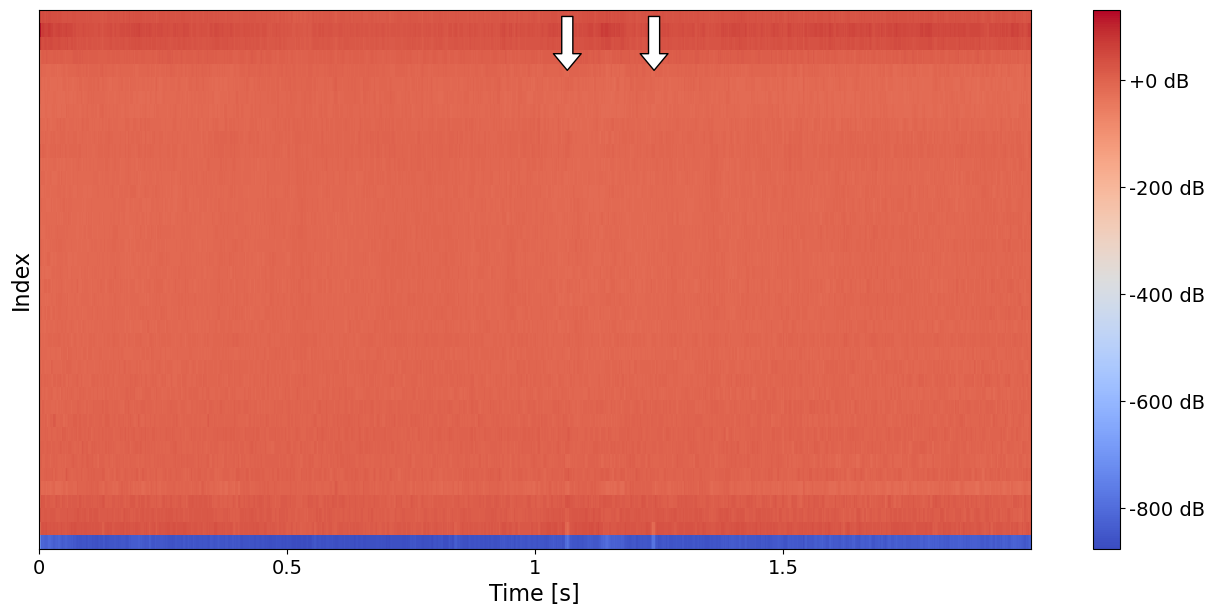

<Figure size 640x480 with 0 Axes>

In [85]:
mfccs = librosa.feature.mfcc(y=y, sr=44_100, n_mfcc=40, n_fft=440, hop_length=110, fmax=2500)
fig = plt.figure(figsize=(16, 7))
img = librosa.display.specshow(mfccs, x_axis="time", sr=44_100, fmax=2500, n_fft=440, hop_length=110)
# plt.ylim([0, 2500])
bowel_sounds_idxs = [1.065, 1.24] #[0.23, 0.34, 1.14, 1.24]
cbar = fig.colorbar(img, ax=plt.gca(), format="%+2.f dB")
cbar.ax.tick_params(labelsize=14)
for bs_id in bowel_sounds_idxs:
    plt.annotate("", xy=(bs_id, 35), xytext=(bs_id, 39), arrowprops=dict(facecolor='white', shrink=0., width=8, headwidth=20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Time [s]", fontsize=16)
plt.ylabel("Index", fontsize=16)
plt.show();
plt.tight_layout();
fig.savefig("./mfcc_plot_with_bs.jpg", dpi=200);

## Sampling


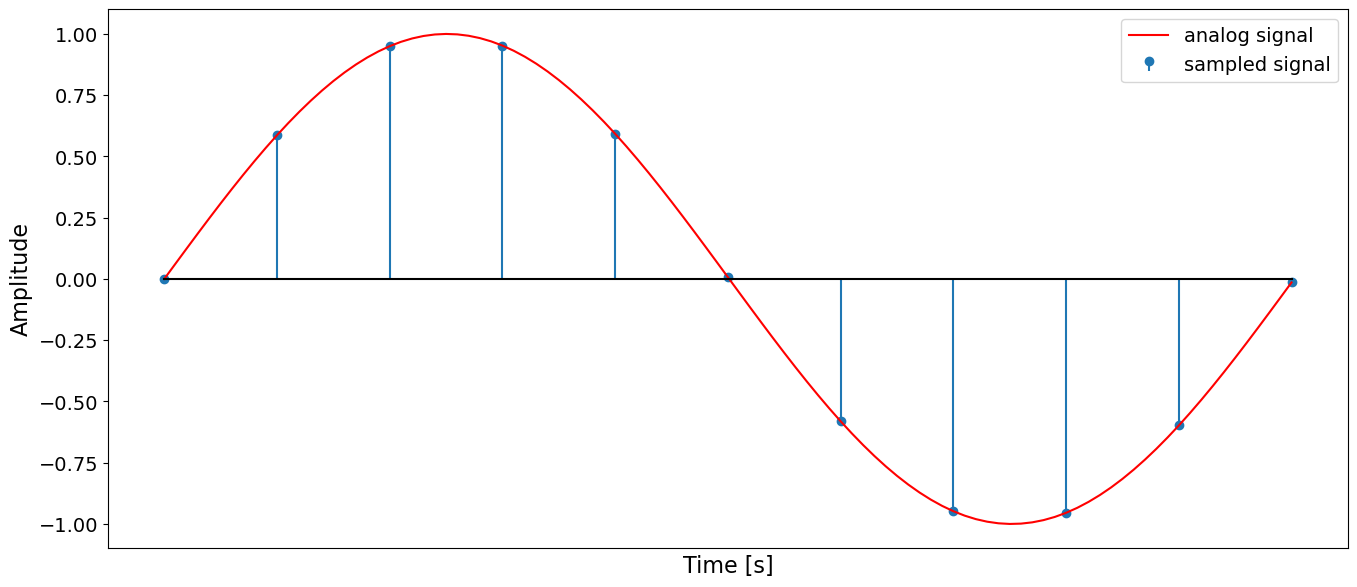

In [23]:
# Generate a sine wave
fs = 44100  # Sample rate (samples/sec)
f = 440  # Frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)
sine_wave = np.sin(2 * np.pi * f * t)

# Sample the sine wave
sampling_rate = 10  # Sampling rate (samples/sec)
samples = sine_wave[::sampling_rate]
sample_times = t[::sampling_rate]

# Plot the samples
plt.figure(figsize=(16, 7))
plt.stem(sample_times[:11], samples[:11], label="sampled signal", basefmt=" ")
plt.plot(t[:101], sine_wave[:101], c="red", label="analog signal" )
plt.plot(t[:101], [0]*101, c="black")
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)
# plt.title('Sampling Process')
plt.legend(fontsize=14)
# sampling is done before quantization
plt.savefig("./sampling.jpg", dpi=200);

plt.show()



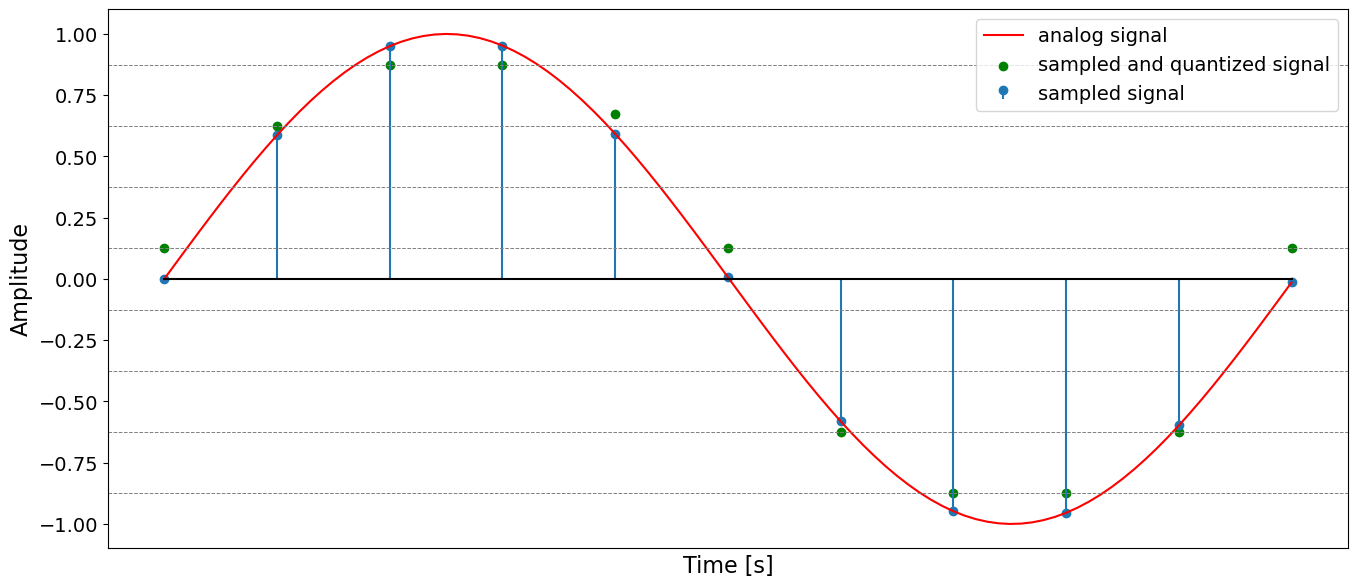

In [24]:
plt.figure(figsize=(16, 7))
plt.stem(sample_times[:11], samples[:11], label="sampled signal", basefmt=" ")
plt.plot(t[:101], sine_wave[:101], c="red", label="analog signal" )
plt.plot(t[:101], [0]*101, c="black")
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)
# plt.title('Sampling Process')
quantization_points = [0.125, -0.125, 0.375, -0.375, 0.625, -0.625, 0.875, -0.875]
for p in quantization_points:
    plt.axhline([p], ls="--", c="gray", lw=0.7)
plt.scatter(sample_times[:11], [0.125, 0.625, 0.875, 0.875, 0.675, 0.125, -0.625, -0.875, -0.875, -0.625, 0.125], c="green", label="sampled and quantized signal")
plt.legend(fontsize=14)

# plt.show()
plt.savefig("./quantization.jpg", dpi=200);


In [14]:
len([0.125, 0.625, 0.875, 0.875, 0.675, 0.125, -0.875, -0.875, -0.675])

9

In [15]:
2/8

0.25

In [16]:
0.375 + 0.25 + 0.25

0.875